In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('housing.csv')

<Axes: xlabel='longitude', ylabel='latitude'>

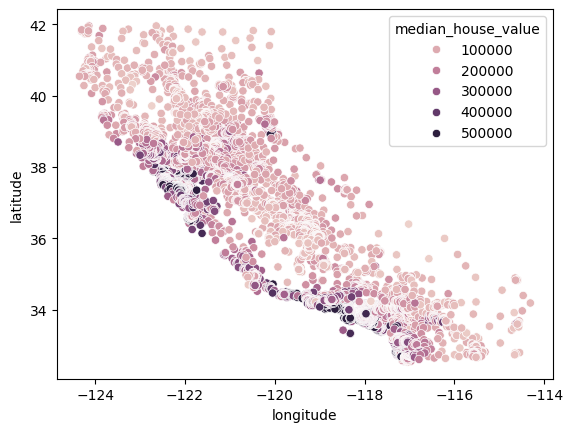

In [3]:
sb.scatterplot(data=df,x="longitude",y="latitude",hue="median_house_value")

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train,x_test,y_train,y_test = train_test_split(df[['longitude','latitude']],df['median_house_value'],test_size=0.2,random_state=0)

In [6]:
from sklearn.preprocessing import normalize

In [7]:
x_train_norm = normalize(x_train)
x_test_norm = normalize(x_test)

In [8]:
model = KMeans(n_clusters=3,random_state=0,n_init='auto')
model.fit(x_train_norm)

C:\Users\Pst John\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Pst John\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Pst John\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Pst John\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1022, in __init__
    self._execute_child(args, executable, preexec_fn, c

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

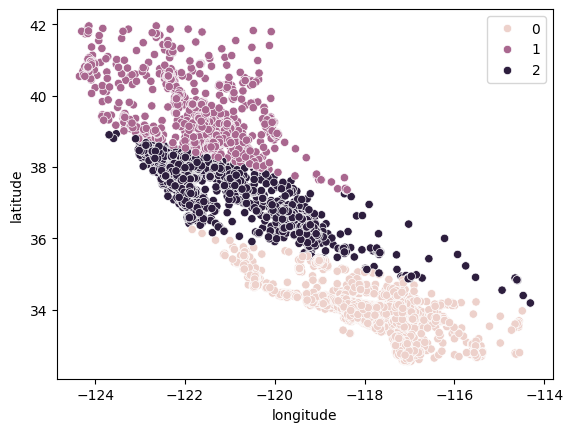

In [9]:
sb.scatterplot(data=x_train,x='longitude',y='latitude',hue=model.labels_)

<Axes: ylabel='median_house_value'>

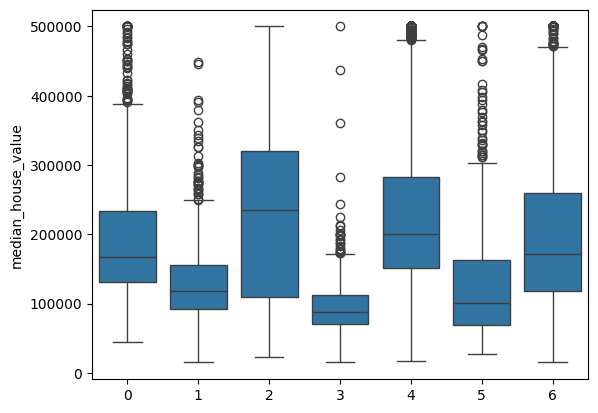

In [38]:
sb.boxplot(x = model.labels_, y = y_train)

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
silhouette_score(x_train_norm,model.labels_,metric='euclidean')

0.7488438246072837

**Looping through ranges to see what best fit**

In [16]:
fits = []
score = []
for k in range(2,8):
    model = KMeans(n_clusters=k,random_state=0,n_init='auto').fit(x_train_norm)
    fits.append(model)
    score.append(silhouette_score(x_train_norm,model.labels_,metric='euclidean'))

<Axes: xlabel='longitude', ylabel='latitude'>

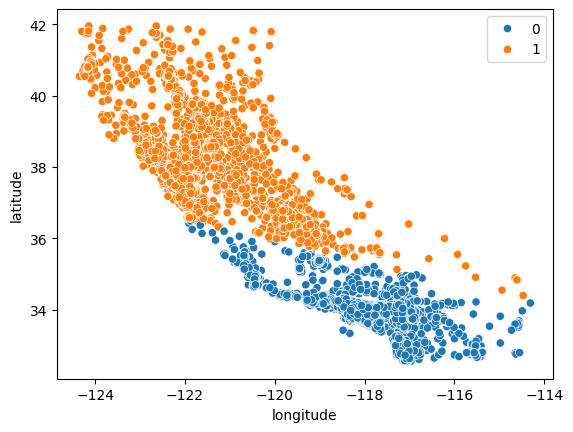

In [18]:
sb.scatterplot(data=x_train,x='longitude',y='latitude',hue=fits[0].labels_)

<Axes: xlabel='longitude', ylabel='latitude'>

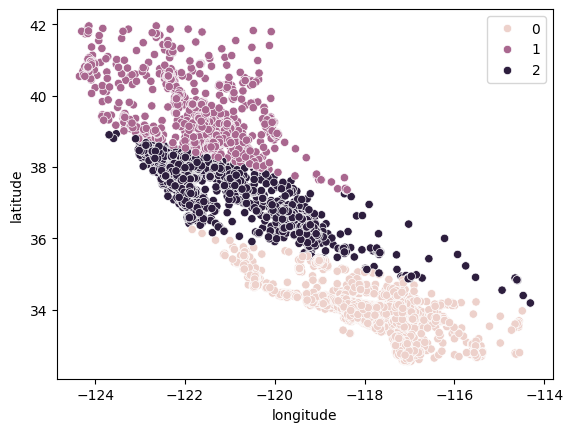

In [19]:
sb.scatterplot(data=x_train,x='longitude',y='latitude',hue=fits[1].labels_)

<Axes: xlabel='longitude', ylabel='latitude'>

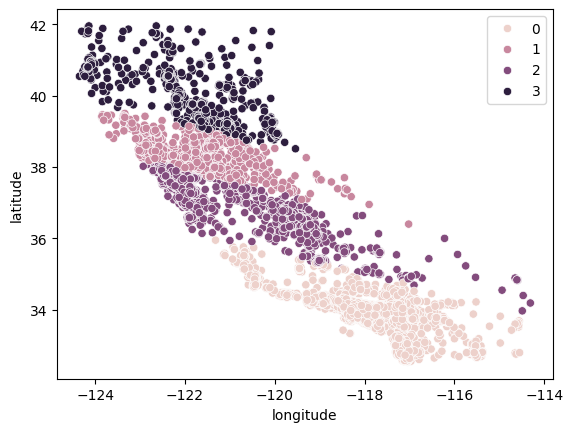

In [37]:
sb.scatterplot(data=x_train,x='longitude',y='latitude',hue=fits[2].labels_)

**Viewing the best number to use on k for clustering**

<Axes: >

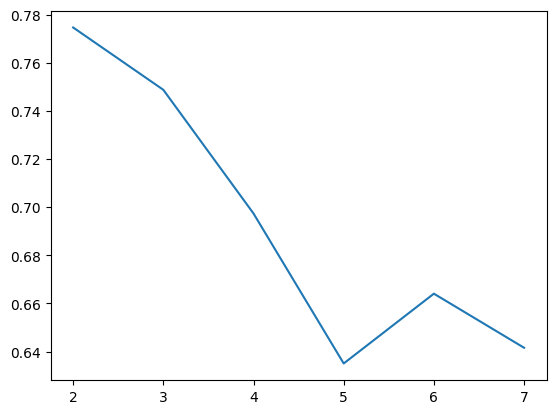

In [25]:
k=range(2,8)
sb.lineplot(x=k,y=score)

<Axes: ylabel='median_house_value'>

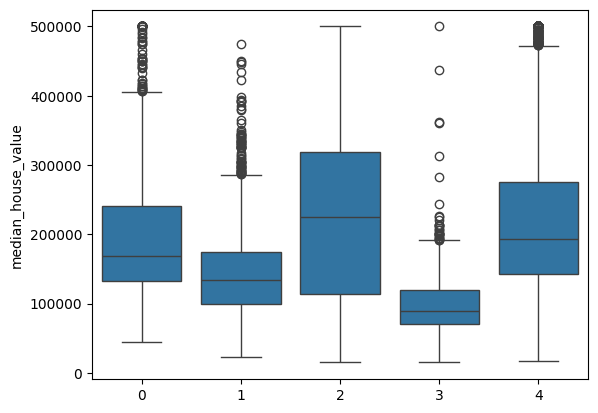

In [33]:
sb.boxplot(x = fits[3].labels_, y = y_train)